In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

In [57]:
df = pd.read_csv("SeoulBikeData.csv")

# Remove non functioning Days
df = df[df['Functioning Day'] == 'Yes']

# select winter seasons
df =df[df["Seasons"] == "Winter"]

In [58]:
# separate into snowfall and no snowfall data
df_snowfall = df[df["Snowfall (cm)"] > 0]
df_no_snowfall = df[df["Snowfall (cm)"] == 0]

print("Number of points with snowfall: ", len(df_snowfall))
print("Number of points with no snowfall: ", len(df_no_snowfall))

Number of points with snowfall:  392
Number of points with no snowfall:  1768


In [59]:
# Average bike rentals during both seasons
mean_snowfall = df_snowfall["Rented Bike Count"].mean()
mean_noSnowfall = df_no_snowfall["Rented Bike Count"].mean()

print("Average bike rentals during snowfall: ", mean_snowfall)
print("Average bike rentals during no snowfall: ", mean_noSnowfall)

Average bike rentals during snowfall:  157.30357142857142
Average bike rentals during no snowfall:  240.670814479638


In [60]:
sigmaSnowfall = 0

sigmaSnowfall = (df_snowfall["Rented Bike Count"] - mean_snowfall).pow(2).sum()
sigmaSnowfall = sigmaSnowfall / len(df_snowfall)

sigmaNoSnowfall = 0

sigmaNoSnowfall = (df_no_snowfall["Rented Bike Count"] - mean_noSnowfall).pow(2).sum()
sigmaNoSnowfall = sigmaNoSnowfall / len(df_no_snowfall)

print("Standard deviation of bike rentals during snowfall: ", np.sqrt(sigmaSnowfall))
print("Standard deviation of bike rentals during no snowfall: ", np.sqrt(sigmaNoSnowfall))

Standard deviation of bike rentals during snowfall:  109.10574437962767
Standard deviation of bike rentals during no snowfall:  153.98643284765893


In [61]:
print("Variance of bike rentals during snowfall: ", sigmaSnowfall)
print("Variance of bike rentals during no snowfall: ", sigmaNoSnowfall)

Variance of bike rentals during snowfall:  11904.063456632653
Variance of bike rentals during no snowfall:  23711.821501146576


In [62]:
# Calculate Test Statistic T
T = (mean_snowfall - mean_noSnowfall) / np.sqrt(sigmaSnowfall/len(df_snowfall) + sigmaNoSnowfall/len(df_no_snowfall))
print("Test Statistic T: ", T)

Test Statistic T:  -12.599742371278047


In [63]:
# Do Z test
from scipy.stats import norm

alpha = 0.05
z = norm.ppf(1-alpha/2)

print("Z value: ", z)

Z value:  1.959963984540054


In [64]:
if(T >= -z):
    print("Null Hypothesis is accepted")
else:
    print("Failed to accept Null Hypothesis")

Failed to accept Null Hypothesis


In [65]:
# Calculate p value
p = norm.cdf(T)
print("P value: ", p)

P value:  1.0591764873897083e-36


# Question II


In [66]:
# Read again the data
df = pd.read_csv("SeoulBikeData.csv")

# Remove the non functioning days
df = df[df['Functioning Day'] == 'Yes']

# Filter out the data with non zero rainfall
df = df[df['Rainfall(mm)'] != 0]

print("number of rows with non zero rainfall: ", df.shape[0])

number of rows with non zero rainfall:  516


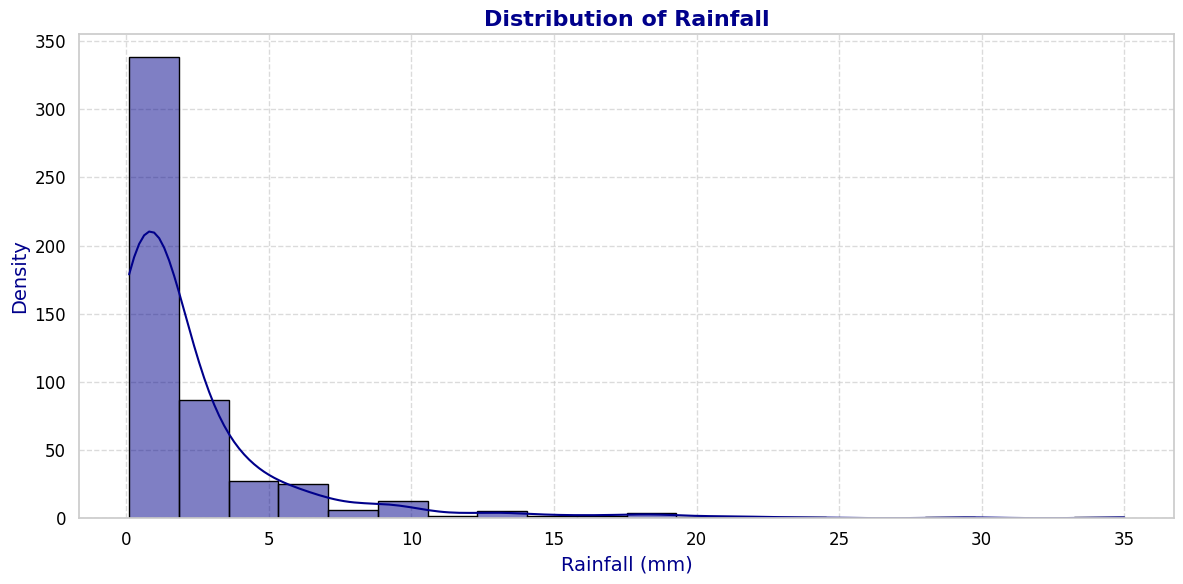

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Rainfall(mm)'], bins=20, color='darkblue', edgecolor='black', kde=True, linewidth=1)

# Title and labels
plt.title('Distribution of Rainfall', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Rainfall (mm)', fontsize=14, color='darkblue')
plt.ylabel('Density', fontsize=14, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_368280/1555155085.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rainfall(mm)', data=df, palette='Set2', linewidth=2)


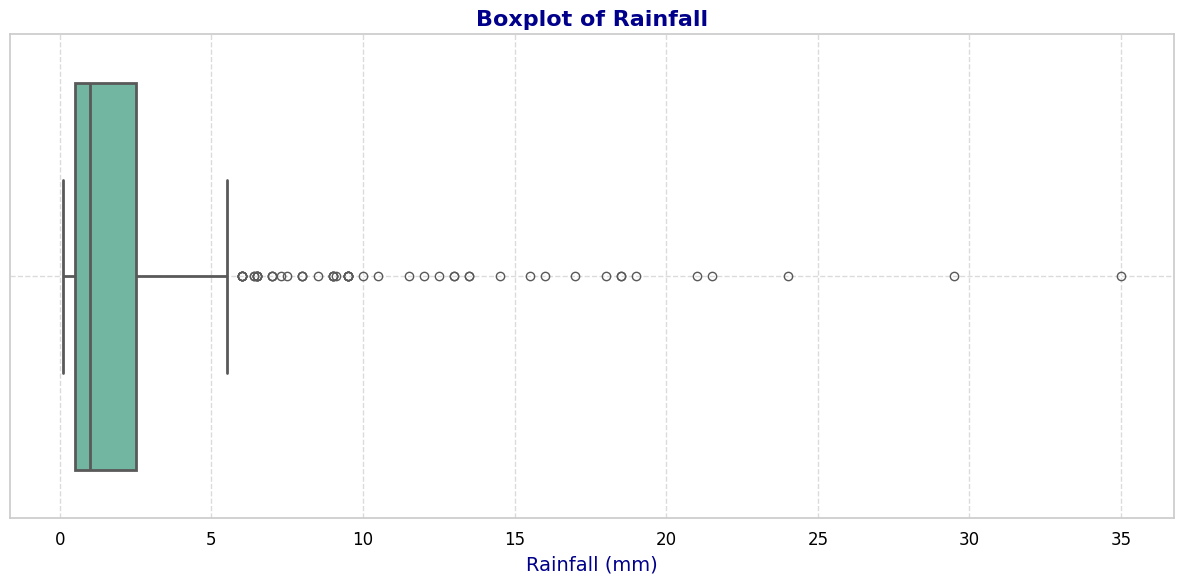

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rainfall(mm)', data=df, palette='Set2', linewidth=2)

# Title and labels
plt.title('Boxplot of Rainfall', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Rainfall (mm)', fontsize=14, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


In [69]:
# Separate based on Quartiles

dfQuartile1 = df[df['Rainfall(mm)'] < 0.5]
dfQuartile2 = df[(df['Rainfall(mm)'] >= 0.5) & (df['Rainfall(mm)'] < 1.00)]
dfQuartile3 = df[(df['Rainfall(mm)'] >= 1.00) & (df['Rainfall(mm)'] < 2.50)]
dfQuartile4 = df[df['Rainfall(mm)'] >= 2.50]

In [70]:
print("Number of rows in Quartile 1: ", dfQuartile1.shape[0])
print("Number of rows in Quartile 2: ", dfQuartile2.shape[0])
print("Number of rows in Quartile 3: ", dfQuartile3.shape[0])
print("Number of rows in Quartile 4: ", dfQuartile4.shape[0])

Number of rows in Quartile 1:  89
Number of rows in Quartile 2:  121
Number of rows in Quartile 3:  160
Number of rows in Quartile 4:  146


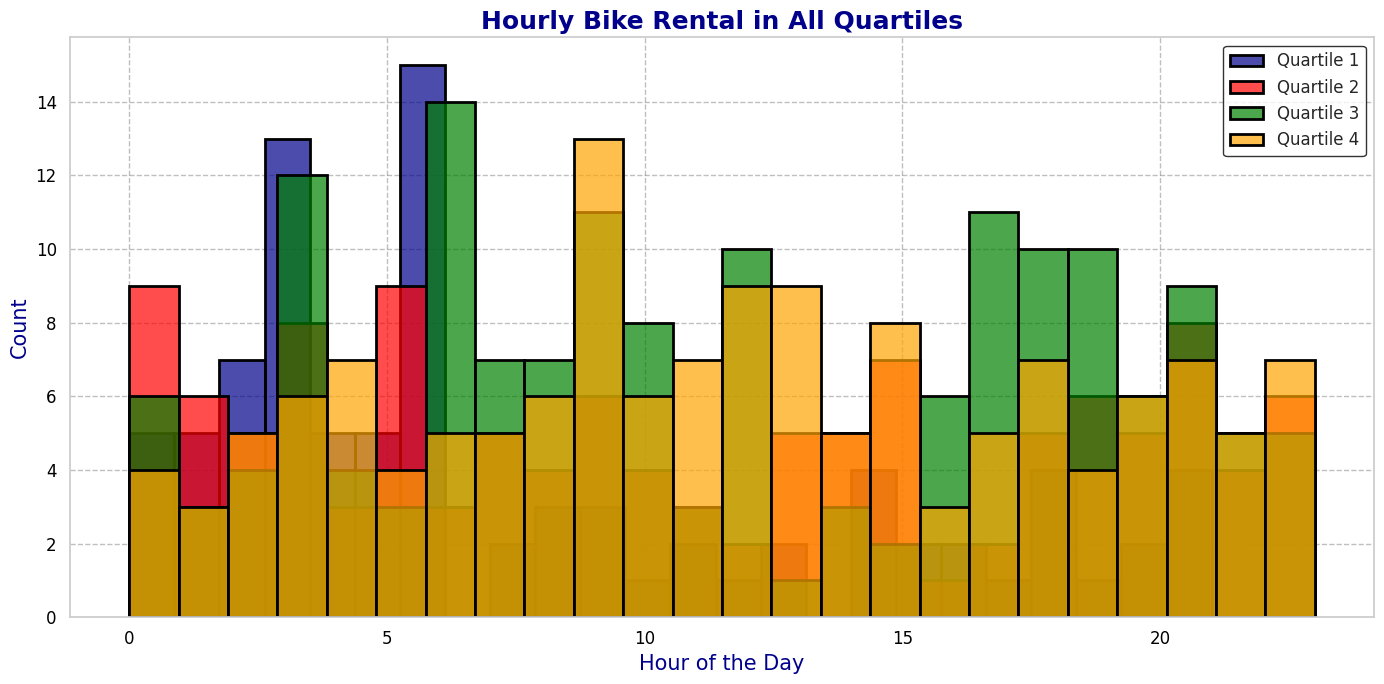

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 7))

# Quartile 1
sns.histplot(dfQuartile1['Hour'], bins=24, color='darkblue', edgecolor='black', kde=False, linewidth=2, label='Quartile 1', alpha=0.7)

# Quartile 2
sns.histplot(dfQuartile2['Hour'], bins=24, color='red', edgecolor='black', kde=False, linewidth=2, label='Quartile 2', alpha=0.7)

# Quartile 3
sns.histplot(dfQuartile3['Hour'], bins=24, color='green', edgecolor='black', kde=False, linewidth=2, label='Quartile 3', alpha=0.7)

# Quartile 4
sns.histplot(dfQuartile4['Hour'], bins=24, color='orange', edgecolor='black', kde=False, linewidth=2, label='Quartile 4', alpha=0.7)

# Title and labels
plt.title('Hourly Bike Rental in All Quartiles', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Hour of the Day', fontsize=15, color='darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Add legend
plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

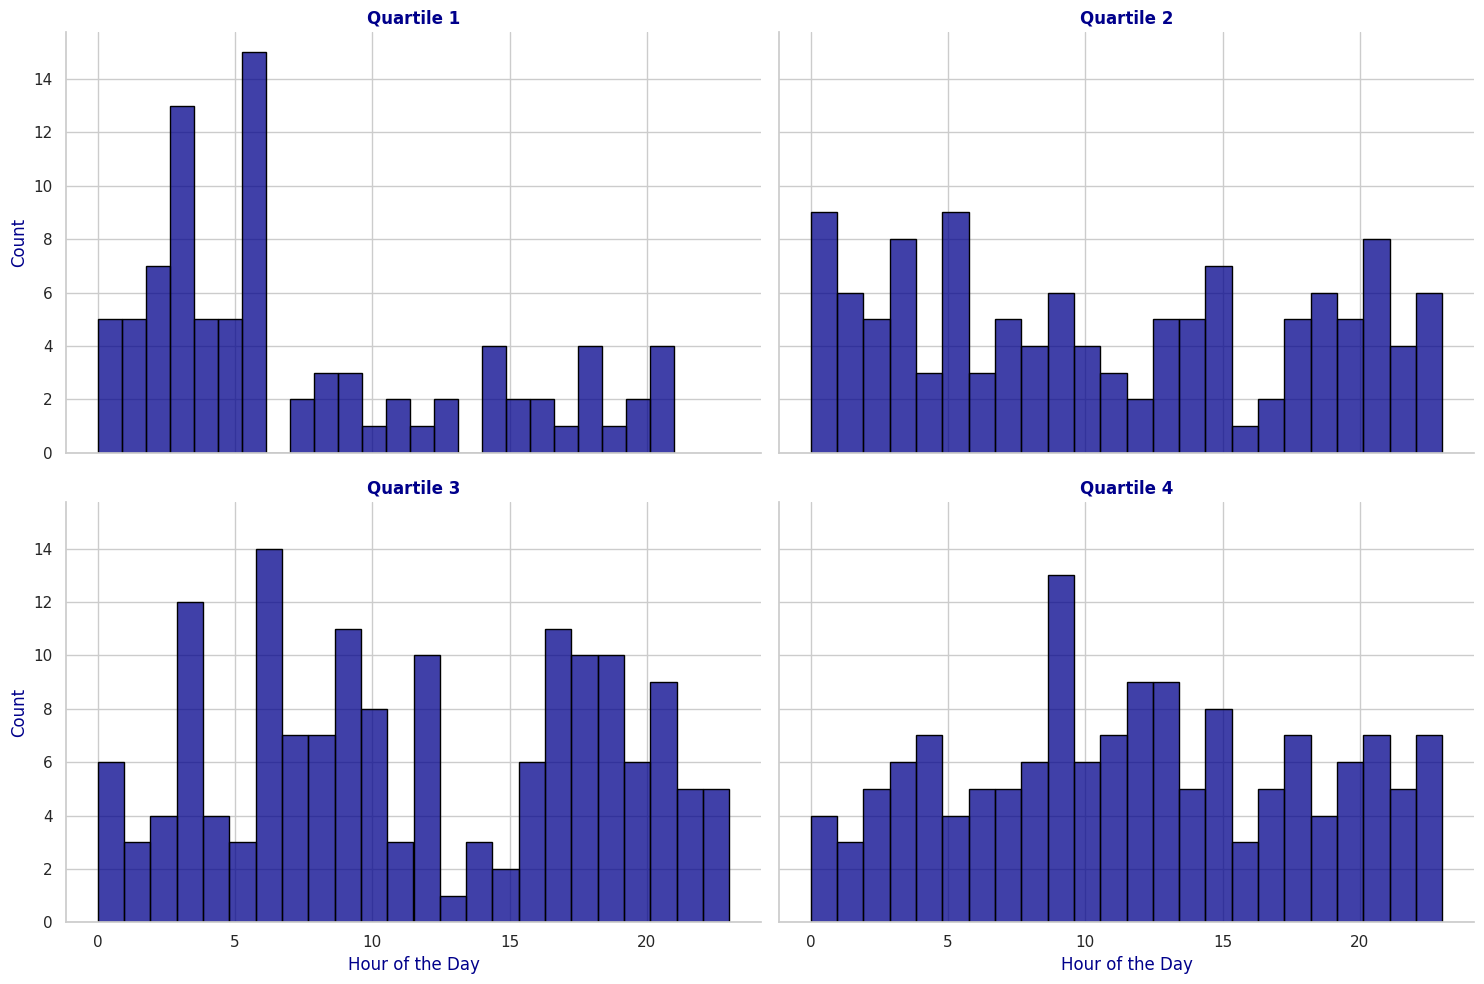

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine quartiles into a single DataFrame for facet plotting
df_combined = pd.concat([
    dfQuartile1.assign(Quartile='Quartile 1'),
    dfQuartile2.assign(Quartile='Quartile 2'),
    dfQuartile3.assign(Quartile='Quartile 3'),
    dfQuartile4.assign(Quartile='Quartile 4')
])

# Plot
plt.figure(figsize=(14, 7))
g = sns.FacetGrid(df_combined, col='Quartile', col_wrap=2, height=5, aspect=1.5)
g.map(sns.histplot, 'Hour', bins=24, color='darkblue', edgecolor='black', kde=False)

# Titles and labels
g.set_titles(col_template="{col_name}", fontsize=14, fontweight='bold', color='darkblue')
g.set_axis_labels('Hour of the Day', 'Count', fontsize=12, color='darkblue')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Note: I have used chatGPT to make these plots more beautiful

In [73]:
mean1 = dfQuartile1['Rented Bike Count'].mean()
mean2 = dfQuartile2['Rented Bike Count'].mean()
mean3 = dfQuartile3['Rented Bike Count'].mean()
mean4 = dfQuartile4['Rented Bike Count'].mean()

print("Mean of Rented Bike Count in Quartile 1: ", mean1)
print("Mean of Rented Bike Count in Quartile 2: ", mean2)
print("Mean of Rented Bike Count in Quartile 3: ", mean3)
print("Mean of Rented Bike Count in Quartile 4: ", mean4)

Mean of Rented Bike Count in Quartile 1:  252.0561797752809
Mean of Rented Bike Count in Quartile 2:  252.27272727272728
Mean of Rented Bike Count in Quartile 3:  127.1875
Mean of Rented Bike Count in Quartile 4:  89.02054794520548


In [74]:
SSW = 0
SSW += sum((dfQuartile1['Rented Bike Count'] - mean1) ** 2)
SSW += sum((dfQuartile2['Rented Bike Count'] - mean2) ** 2)
SSW += sum((dfQuartile3['Rented Bike Count'] - mean3) ** 2)
SSW += sum((dfQuartile4['Rented Bike Count'] - mean4) ** 2)

print("SSW: ", SSW)


SSW:  33201816.03245729


In [75]:
SSB = 0

SSB += len(dfQuartile1) * (mean1 - df['Rented Bike Count'].mean()) ** 2
SSB += len(dfQuartile2) * (mean2 - df['Rented Bike Count'].mean()) ** 2
SSB += len(dfQuartile3) * (mean3 - df['Rented Bike Count'].mean()) ** 2
SSB += len(dfQuartile4) * (mean4 - df['Rented Bike Count'].mean()) ** 2

print("SSB: ", SSB)


SSB:  2665086.6865349603


In [76]:
F = (SSB / 3) / (SSW / (len(dfQuartile1) + len(dfQuartile2) + len(dfQuartile3) + len(dfQuartile4) - 4))

print("F: ", F)

F:  13.6992946627977


In [77]:
# Import the f-distribution
from scipy.stats import f

# Define the number of groups and the degrees of freedom
num_groups = 4
dfn = num_groups - 1
dfd = len(dfQuartile1) + len(dfQuartile2) + len(dfQuartile3) + len(dfQuartile4) - num_groups

# Calculate the critical value
critical_value = f.ppf(0.95, dfn, dfd)

print("Critical Value: ", critical_value)

Critical Value:  2.6223153068438396


In [78]:
# Compare the F-value with the critical value
if F > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

Reject the null hypothesis: There is a significant difference between the group means.


In [79]:
# Calculate the p-value
p_value = 1 - f.cdf(F, dfn, dfd)

print("P-Value: ", p_value)

P-Value:  1.3142755661554872e-08


In [80]:


# Verify the results using the ANOVA test
from scipy.stats import f_oneway

# Perform the ANOVA test
f_statistic, p_value = f_oneway(dfQuartile1['Rented Bike Count'], dfQuartile2['Rented Bike Count'], dfQuartile3['Rented Bike Count'], dfQuartile4['Rented Bike Count'])

print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

F-Statistic:  13.699294662797698
P-Value:  1.3142755691851183e-08


# Question III

In [81]:
# Read the data
df = pd.read_csv("SeoulBikeData.csv")

# Remove the non functioning days
df = df[df['Functioning Day'] == 'Yes']

# Separate Spring and Winter data
df_spring = df[df['Seasons'] == 'Spring']
df_summer = df[df['Seasons'] == 'Summer']

print("Number of rows in Spring data: ", df_spring.shape[0])
print("Number of rows in Winter data: ", df_summer.shape[0])

Number of rows in Spring data:  2160
Number of rows in Winter data:  2208


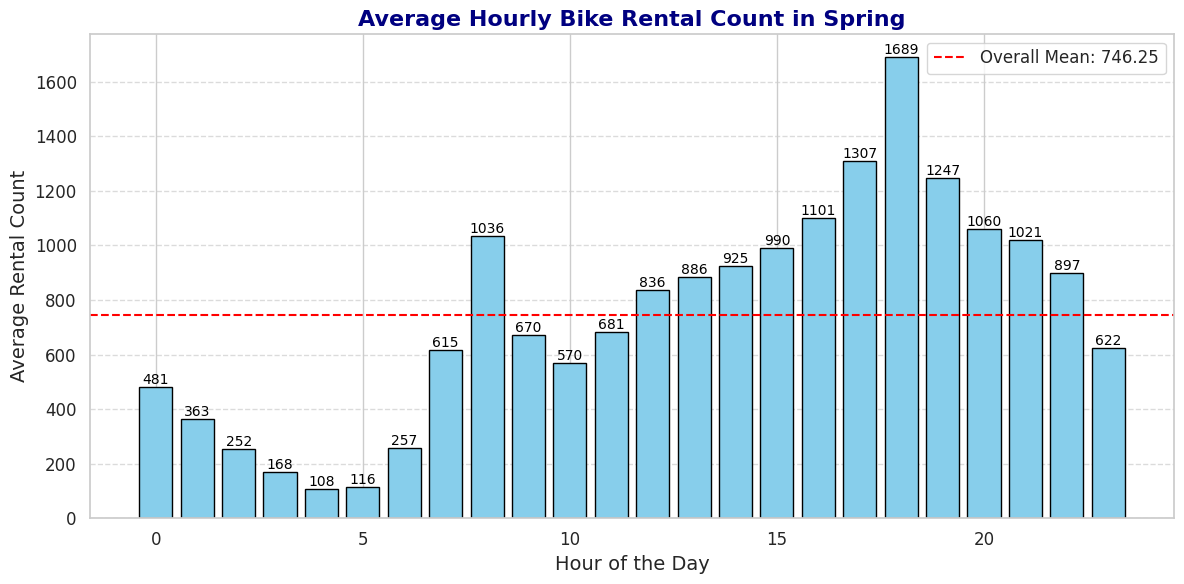

In [82]:
import matplotlib.pyplot as plt

# Group by 'Hour' and calculate the mean 'Rented Bike Count' for spring
avg_hourly_rentals_spring = df_spring.groupby('Hour')['Rented Bike Count'].mean()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_hourly_rentals_spring.index, avg_hourly_rentals_spring, color='skyblue', edgecolor='black')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Title and labels
plt.title('Average Hourly Bike Rental Count in Spring', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Rental Count', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the mean
mean_value = avg_hourly_rentals_spring.mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {mean_value:.2f}')
plt.legend(fontsize=12, loc='upper right')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


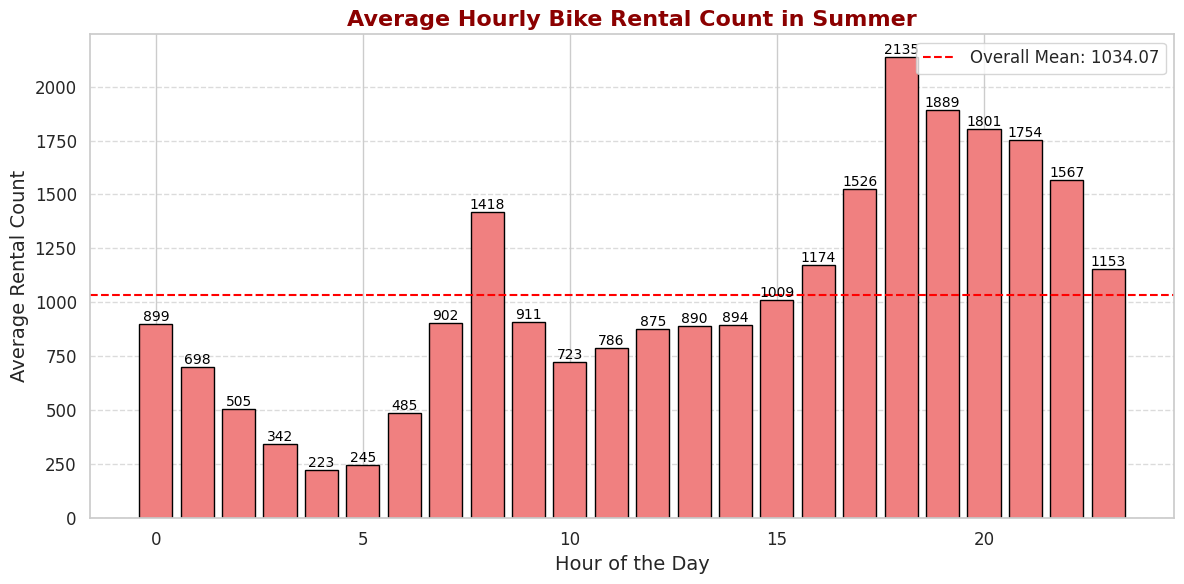

In [83]:
import matplotlib.pyplot as plt

# Group by 'Hour' and calculate the mean 'Rented Bike Count' for summer
avg_hourly_rentals_summer = df_summer.groupby('Hour')['Rented Bike Count'].mean()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_hourly_rentals_summer.index, avg_hourly_rentals_summer, color='lightcoral', edgecolor='black')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Title and labels
plt.title('Average Hourly Bike Rental Count in Summer', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Rental Count', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the mean
mean_value = avg_hourly_rentals_summer.mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {mean_value:.2f}')
plt.legend(fontsize=12, loc='upper right')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


In [84]:
# Make a dataframe with 2 columns: Spring and summer and rows as average hourly bike rental count
df_spring_avg = df_spring.groupby('Hour')['Rented Bike Count'].mean()
df_summer_avg = df_summer.groupby('Hour')['Rented Bike Count'].mean()


In [85]:
# Merge the two dataframes
df_merged = pd.merge(df_spring_avg, df_summer_avg, on='Hour')
df_merged.columns = ['Spring', 'Summer']



In [86]:
# Add Row sum and Column sum
df_merged.loc['Column Sum'] = df_merged.sum()
df_merged['Row Sum'] = df_merged.sum(axis=1)


In [87]:
# Calculate the Expected Values for the Summer Season using formula (Row Total * Column Total) / Grand Total
df_merged["Expected Spring"] = 3
df_merged["Expected Summer"] = 3



In [88]:

try:
    colSum1 = df_merged.loc['Column Sum'].iloc[0]
    print(f'colSum1: {colSum1}')

    colSum2 = df_merged.loc['Column Sum'].iloc[1]
    print(f'colSum2: {colSum2}')

    total = df_merged.loc['Column Sum'].iloc[2]
    print(f'total: {total}')
except KeyError as e:
    print(f'KeyError: {e} - Check if the index exists in the DataFrame')
except IndexError as e:
    print(f'IndexError: {e} - Check if the position indices are correct')


colSum1: 17910.1
colSum2: 24817.760869565216
total: 42727.860869565215


In [89]:
# Ensure 'Expected Spring' and 'Expected Summer' columns exist
df_merged['Expected Spring'] = 0.0
df_merged['Expected Summer'] = 0.0

# Calculate expected values
for i in range(24):
    expectedValue1 = df_merged.iloc[i]['Row Sum'] * colSum1 / total
    expectedValue2 = df_merged.iloc[i]['Row Sum'] * colSum2 / total

    # Use .at[] for scalar assignments to avoid warnings
    df_merged.at[i, 'Expected Spring'] = expectedValue1
    df_merged.at[i, 'Expected Summer'] = expectedValue2



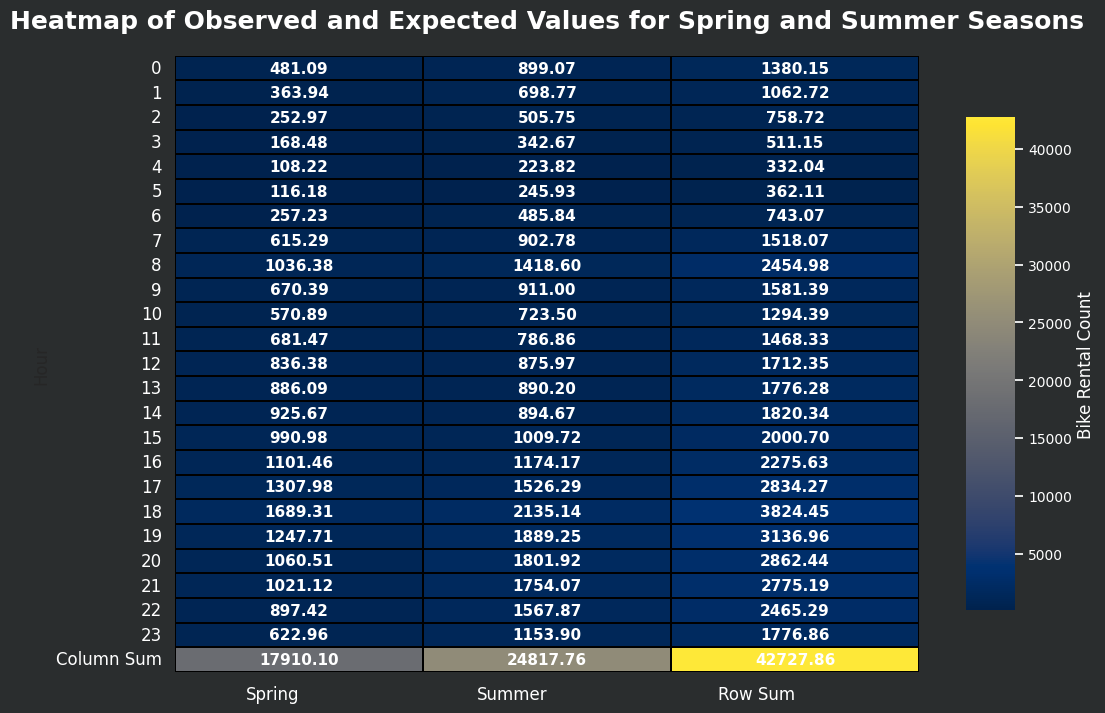

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots to a dark background
sns.set(style="darkgrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap with a different color palette and enhanced styling
heatmap = sns.heatmap(
    df_merged.iloc[:, :3], 
    annot=True, 
    fmt=".2f", 
    cmap='cividis',  # Changed to a vibrant color palette
    linewidths=0.3,  # Subtle grid lines
    linecolor='black',  # Grid line color
    cbar_kws={'shrink': 0.8, 'aspect': 10},  # Customized color bar
    annot_kws={"size": 11, "weight": "bold", "color": "white"},  # Annotation text style
)

# Add a title with custom styling
plt.title('Heatmap of Observed and Expected Values for Spring and Summer Seasons', 
          fontsize=18, weight='bold', color='white', pad=20)

# Rotate the x and y labels for better readability
plt.xticks(ha='right', fontsize=12, color='white')
plt.yticks(rotation=0, fontsize=12, color='white')

# Customize axes and background
heatmap.figure.set_facecolor('#2a2d2e')  # Set background color
heatmap.set_facecolor('#2a2d2e')  # Set the face color of the plot

# Add a color bar with a label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Bike Rental Count', fontsize=12, color='white')
colorbar.ax.tick_params(labelsize=10, colors='white')

# Show the plot
plt.show()


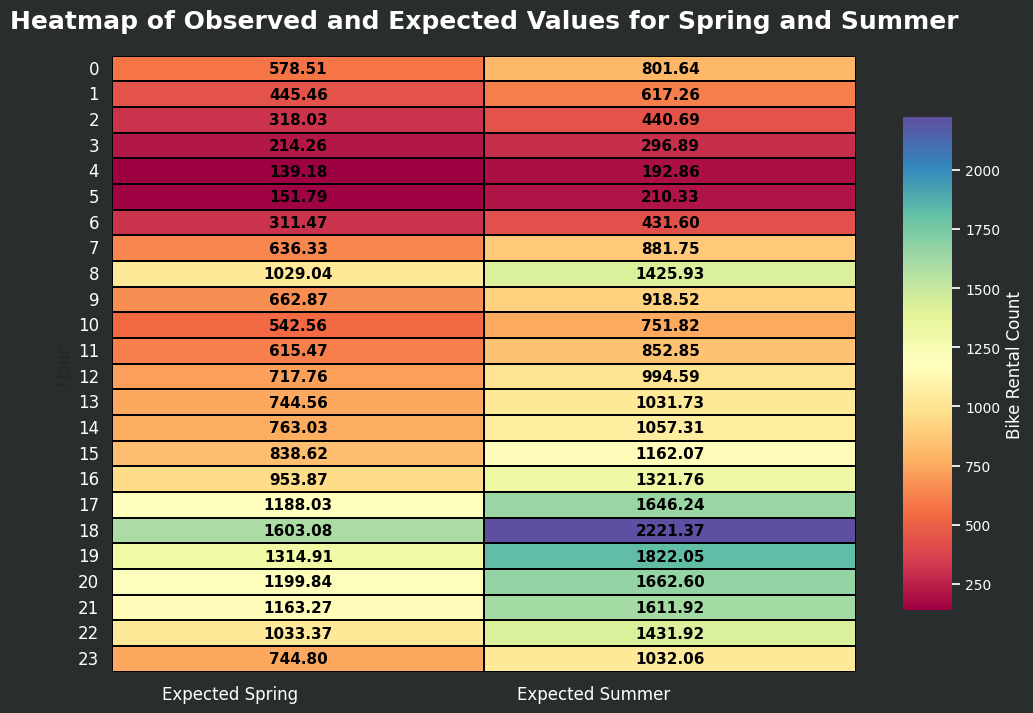

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap for the next two columns with enhanced aesthetics
heatmap = sns.heatmap(
    df_merged.iloc[:-1, 3:5],  # Select the next two columns
    annot=True, 
    fmt=".2f", 
    cmap='Spectral',  # Use a vibrant color palette
    linewidths=0.3,  # Add subtle grid lines
    linecolor='black',  # Grid line color
    cbar_kws={'shrink': 0.8, 'aspect': 10},  # Customize color bar
    annot_kws={"size": 11, "weight": "bold", "color": "black"},  # Annotation text style
)

# Add a title with custom styling
plt.title('Heatmap of Observed and Expected Values for Spring and Summer', 
          fontsize=18, weight='bold', color='white', pad=20)

# Rotate the x and y labels for better readability
plt.xticks(ha='right', fontsize=12, color='white')
plt.yticks(rotation=0, fontsize=12, color='white')

# Customize axes and background
heatmap.figure.set_facecolor('#2a2d2e')  # Set background color
heatmap.set_facecolor('#2a2d2e')  # Set the face color of the plot

# Add a color bar with a label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Bike Rental Count', fontsize=12, color='white')
colorbar.ax.tick_params(labelsize=10, colors='white')

# Show the plot
plt.show()


In [92]:
# Compute the Test Statistic for Chi-Square Test where Observed is the summer column except for the last row and Expected is the Expected Summer column
T = 0
for i in range(0, 24):
    E = df_merged.iloc[i]["Expected Summer"]
    O = df_merged.iloc[i]["Summer"]
    
    T += ((O - E) ** 2) / E
    
    E = df_merged.iloc[i]["Expected Spring"]
    O = df_merged.iloc[i]["Spring"]
    
    T += ((O - E) ** 2) / E
    
T

536.676606781657

In [93]:
DOF = 24
alpha = 0.05

from scipy.stats import chi2

critical_value = chi2.ppf(1 - alpha, DOF)
critical_value

36.41502850180731

In [94]:
# Compare the Test Statistic with the Critical Value
if T > critical_value:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject the Null Hypothesis


In [95]:
import scipy.stats as stats

# Assuming T is your Chi-Square test statistic and DOF is the degrees of freedom
p_value = stats.chi2.sf(T, DOF)
print(f"p-value: {p_value}")


p-value: 3.932021483326344e-98


In [96]:
# Use library function to perform the Chi-Square Test
from scipy.stats import chi2_contingency

spring_data = df_merged.iloc[:, 0].values
summer_data = df_merged.iloc[:, 1].values

import numpy as np
import scipy.stats as stats
data = np.array([spring_data, summer_data])

chi2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p)
print("Degrees of Freedom: ", dof)


Chi-Square Statistic:  536.676606781657
P-Value:  3.932021483326344e-98
Degrees of Freedom:  24


In [97]:
print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p)
print("Degrees of Freedom: ", dof)
print("Expected: ", expected)

Chi-Square Statistic:  536.676606781657
P-Value:  3.932021483326344e-98
Degrees of Freedom:  24
Expected:  [[  578.51475725   445.45532428   318.02882464   214.25781004
    139.17906551   151.78555715   311.4703832    636.32514653
   1029.04422707   662.86569378   542.56482696   615.47321903
    717.7582165    744.55947739   763.02630539   838.62495848
    953.86828444  1188.03236553  1603.08341705  1314.90989843
   1199.83768162  1163.26639225  1033.36842855   744.79973893
  17910.1       ]
 [  801.63934903   617.26085929   440.68784203   296.89388078
    192.8583741    210.32700324   431.59990666   881.74635105
   1425.9313768    918.52319511   751.82406193   852.85214329
    994.58695258  1031.72506368  1057.31427432  1162.0702106
   1321.76118416  1646.23889051  2221.36899841  1822.05121268
   1662.59734254  1611.92104737  1431.92335889  1032.05799054
  24817.76086957]]
